<a href="https://colab.research.google.com/github/yiyichanmyae/keras/blob/master/Fashion_MNIST_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 X train's shape : (60000, 28, 28)
 Y tain's shape  : (60000,)
LABEL: 9

IMAGE PIXEL ARRAY:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141 

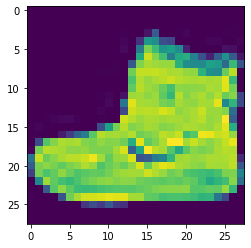

In [15]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Load the Fashion MNIST dataset
fmnist = keras.datasets.fashion_mnist

# Load the training and test split of the Fashion MNIST dataset
(X_train, y_train), (X_test, y_test) = fmnist.load_data()
print(' X train\'s shape :' , X_train.shape)
print(' Y tain\'s shape  :' , y_train.shape)

# You can put between 0 and 59999
index=0
# Set number of characters per row when printing
np.set_printoptions(linewidth=320)
# Print the label and image
print(f'LABEL: {y_train[index]}')
print(f'\nIMAGE PIXEL ARRAY:\n {X_train[index]}')
# Visualize the image
plt.imshow(X_train[index])


[Sequential](https://keras.io/api/models/sequential/): That defines a sequence of layers in the neural network.

[Flatten](https://keras.io/api/layers/reshaping_layers/flatten/): Remember earlier where our images were a 28x28 pixel matrix when you printed them out? Flatten just takes that square and turns it into a 1-dimensional array.

[Dense](https://keras.io/api/layers/core_layers/dense/): Adds a layer of neurons

Each layer of neurons need an [activation function](https://keras.io/api/layers/activations/) to tell them what to do. There are a lot of options, but just use these for now: 

[ReLU](https://keras.io/api/layers/activations/#relu-function) effectively means:

```
if x > 0: 
  return x

else: 
  return 0
```

In other words, it only passes values 0 or greater to the next layer in the network.

[Softmax](https://keras.io/api/layers/activations/#softmax-function) takes a list of values and scales these so the sum of all elements will be equal to 1. When applied to model outputs, you can think of the scaled values as the probability for that class. For example, in your classification model which has 10 units in the output dense layer, having the highest value at `index = 4` means that the model is most confident that the input clothing image is a coat. If it is at index = 5, then it is a sandal, and so forth. See the short code block below which demonstrates these concepts. You can also watch this [lecture](https://www.youtube.com/watch?v=LLux1SW--oM&ab_channel=DeepLearningAI) if you want to know more about the Softmax function and how the values are computed.


In [17]:
# Normalize the pixel values of the train and test images
X_train = X_train/255.0
X_test = X_test/255.0

# Build the classification model
model = keras.Sequential(
    [
      tf.keras.layers.Flatten(),
      keras.layers.Dense(128, activation='relu'),
      keras.layers.Dense(256, activation='relu'),
      keras.layers.Dense(10, activation='softmax')
    ]
)

# Compile the model
model.compile(optimizer=tf.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit( X_train, y_train, epochs=1000)

Epoch 1/1000
1875/1875 [==============================] - 9s 4ms/step - loss: 0.8256 - accuracy: 0.6942
Epoch 2/1000
1875/1875 [==============================] - 8s 4ms/step - loss: 0.5424 - accuracy: 0.8024
Epoch 3/1000
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4783 - accuracy: 0.8288
Epoch 4/1000
1875/1875 [==============================] - 9s 5ms/step - loss: 0.4407 - accuracy: 0.8401
Epoch 5/1000
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4169 - accuracy: 0.8500
Epoch 6/1000
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3979 - accuracy: 0.8566
Epoch 7/1000
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3834 - accuracy: 0.8622
Epoch 8/1000
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3702 - accuracy: 0.8662
Epoch 9/1000
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3576 - accuracy: 0.8701
Epoch 10/1000
1875/1875 [==============================] - 7s 4

KeyboardInterrupt: ignored

In [18]:
# Evaluate the model on unseen data
model.evaluate( X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.9349 - accuracy: 0.8842


[0.9349417686462402, 0.8841999769210815]

In [30]:
# Try Callback

class myCallback(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') is not None and logs.get('accuracy') >= 0.8): 
      print('\nReached 80% accuracy so cancelling training!')
      self.model.stop_training = True

callbacks = myCallback()

fmnist = keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fmnist.load_data()

X_train = X_train/255.0
X_test = X_test/255.0

model = keras.Sequential([
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(258, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=20, callbacks=[callbacks])

model.evaluate(X_test, y_test)

Epoch 1/20
1861/1875 [============================>.] - ETA: 0s - loss: 0.4735 - accuracy: 0.8290
Reached 80% accuracy so cancelling training!
313/313 [==============================] - 1s 2ms/step - loss: 0.4137 - accuracy: 0.8475


[0.4137140214443207, 0.8475000262260437]